In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 

In [5]:
data=pd.read_csv('csp.csv')

In [6]:
data

,property_age,property_type,property_size_sqft,num_rooms,num_bathrooms,location_area,avg_market_price_per_sqft,requested_price,loan_to_value_ratio,approval_status
0,16,Apartment,3041,1,1,Gopanpally,19774.24,60133453.41,67.69,1
1,7,Apartment,2167,4,2,Banjara Hills,12466.35,27014584.37,83.73,0
2,34,Apartment,1825,6,2,Moula Ali,18849.44,34400230.42,55.88,1
3,30,Independent House,993,3,5,Rampally,9076.77,9013235.32,65.36,0
4,33,Apartment,4652,5,4,Kandukur,16186.66,75300357.92,76.70,1
...,...,...,...,...,...,...,...,...,...,...
4994,15,Independent House,1658,1,3,Shabad,7408.67,12283566.65,83.91,0
4995,47,Villa,4544,1,2,Manikonda,15802.32,71805727.96,61.35,1
4996,46,Villa,2573,2,1,Choutuppal,19602.36,50436869.96,54.86,0
4997,31,Independent House,3354,6,2,Manikonda,6552.59,21977374.65,74.27,0


In [7]:
data['location_area'].value_counts()

ECIL             108
Ghatkesar        102
Kapra             96
Alwal             91
Malkajgiri        91
                ... 
Koheda            39
Medchal           38
Nawabpet          37
Rajendranagar     37
Chengicherla      35
Name: location_area, Length: 99, dtype: int64

In [8]:
data['approval_status'].value_counts()

1    2644
0    2355
Name: approval_status, dtype: int64

In [7]:
data.isna().any().any()

False

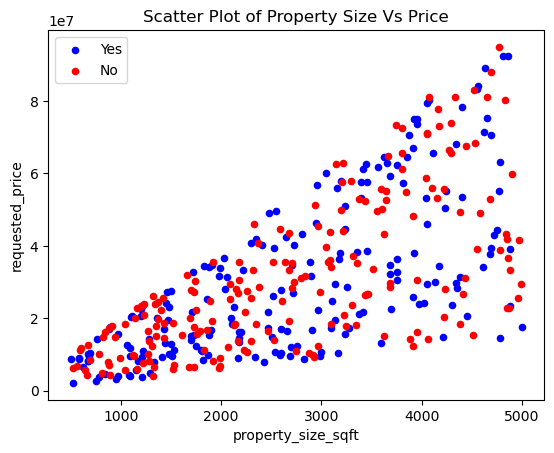

In [8]:
cl1=data[data['approval_status']==1][0:200]
cl2=data[data['approval_status']==0][0:200]
a=cl1.plot(kind='scatter',x='property_size_sqft',y='requested_price',color='blue',label='Yes')
cl2.plot(kind='scatter',x='property_size_sqft',y='requested_price',color='red',label='No',ax=a)
plt.title("Scatter Plot of Property Size Vs Price")
plt.legend()
plt.show()

In [9]:
def one_hot_encode(df,column_dict):
    df=df.copy()
    for column ,prefix in column_dict.items():
        dummies=pd.get_dummies(df[column], prefix=prefix)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    
    return df

In [2]:
def preprocess_inputs(df):
    df=df.copy()
    nominal_feature_dict={
        'property_type':'Property Type',
        'location_area':'Location Area'
    }

    df=one_hot_encode(df,nominal_feature_dict)
 

    y=df['approval_status'].copy()
    X=df.drop('approval_status',axis=1).copy()
    
    X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.5,random_state=123)
    print(X_train)
   
    scaler=StandardScaler()
    scaler.fit(X_train)
    
    X_train=pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
    X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
    return X_train,X_test,y_train,y_test

    

In [3]:
X_train,X_test,y_train,y_test=preprocess_inputs(data)


NameError: name 'data' is not defined

In [1]:
X_train


NameError: name 'X_train' is not defined

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],  
    'gamma': ['scale', 0.1, 0.01, 0.001],  
    'kernel': ['rbf', 'linear','sigmoid','poly']
}


In [38]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [25]:
svm_best = SVC(**grid_search.best_params_)
svm_best.fit(X_train, y_train)
y_pred = svm_best.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred = svm_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"SVM Model Accuracy: {accuracy :.2f}")
print(classification_report(y_test, y_pred))


SVM Model Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.72      0.63      0.67      1205
           1       0.69      0.77      0.73      1295

    accuracy                           0.70      2500
   macro avg       0.70      0.70      0.70      2500
weighted avg       0.70      0.70      0.70      2500



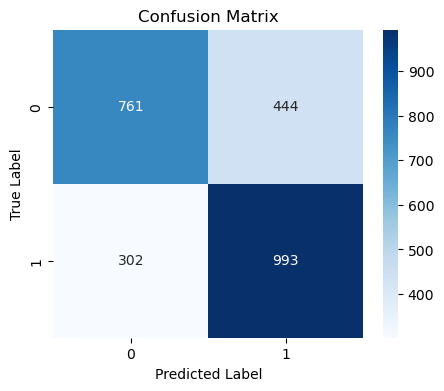

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = svm_best.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
